## Proposal_Group7

## Introduction

### Background

Income inequality is an ongoing issue of great public concern in every country and in the United States it  has a history substantially older than the country itself (NPR,2016). Racial and ethnic communities in the United States are experiencing significant changes in rising income inequality (Kochhar.R & Cilluffo.A, 2018).There are notable wage gaps among American workers by race (Williams.W,2021). Based on these materials, this report aims to explore the correlation between salary and race which is one factor of income inequality. 

### Guiding Question

Is there a difference in means of salaries between people of Asian descent and people of White descent in the USA?

### Dataset

## Prelimary Results

### Reading the Data

Datasets are unable to be read directly from Kaggle. So, the dataset is downloaded to the repository and read from there.

In [15]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(gridExtra)
library(scales)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [5]:
salary_dataset <- read.csv("https://raw.githubusercontent.com/hongkailiu123/stat201_Group7/main/Salary_Data_Based_country_and_race.csv")

In [6]:
head(salary_dataset)

,X,Age,Gender,Education.Level,Job.Title,Years.of.Experience,Salary,Country,Race
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,0,32,Male,Bachelor's,Software Engineer,5,90000,UK,White
2,1,28,Female,Master's,Data Analyst,3,65000,USA,Hispanic
3,2,45,Male,PhD,Senior Manager,15,150000,Canada,White
4,3,36,Female,Bachelor's,Sales Associate,7,60000,USA,Hispanic
5,4,52,Male,Master's,Director,20,200000,USA,Asian
6,5,29,Male,Bachelor's,Marketing Analyst,2,55000,USA,Hispanic


### Cleaning and Wrangling the Data

Since we are only investigating the salaries of American people with Asian or White descent, we will clean the data to our needs

In [25]:
salary <- salary_dataset %>%
                filter(Country == "USA", 
                        Race == c("White", "Asian")) %>%
                        select(-"X")
count(salary)

n
<int>
346


### Plots

#### Salary Distributions

We will begin by visualizing the salary distribution of Asian and White Races

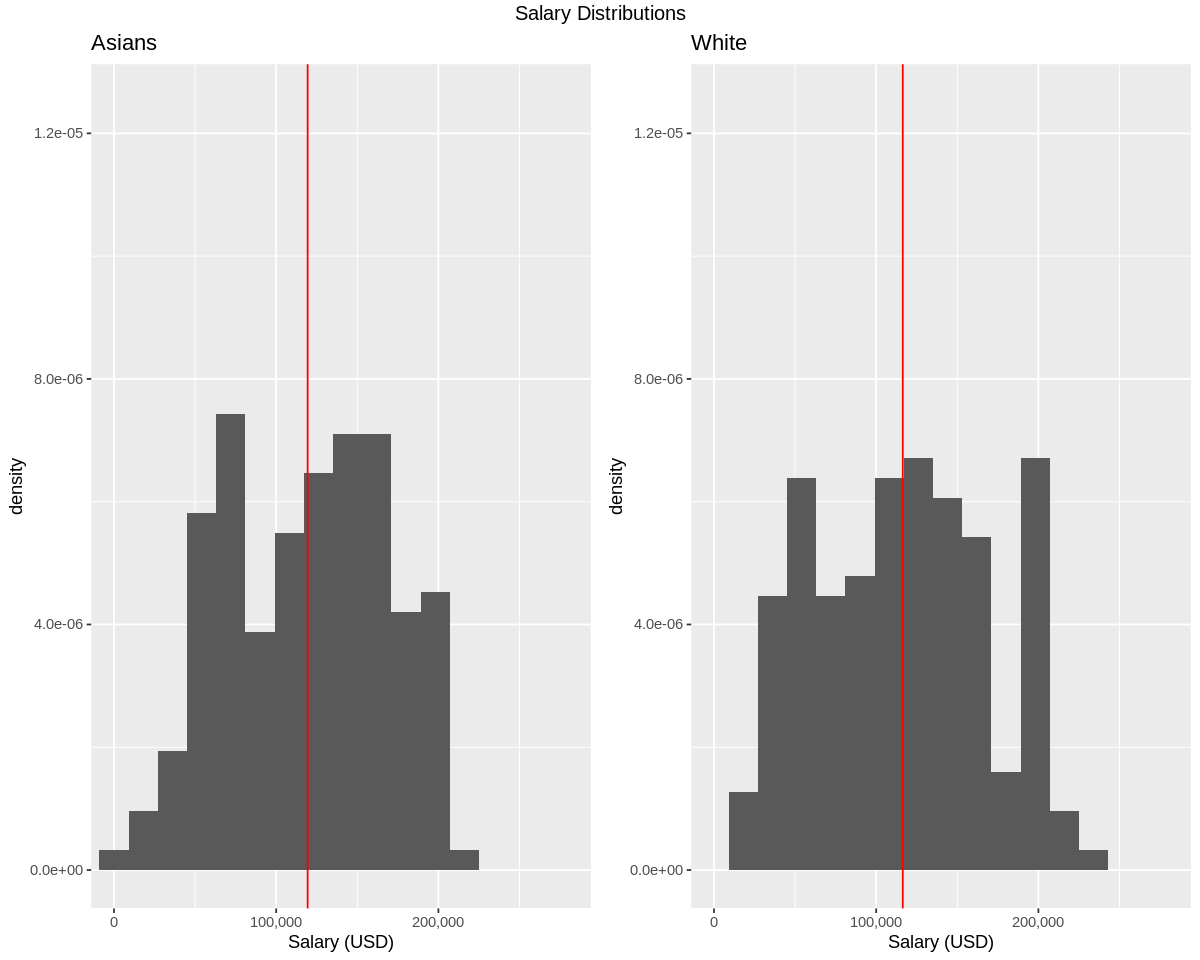

In [18]:
options(repr.plot.width = 10, repr.plot.height = 8) # setting dimensions

asian_dist <- salary %>% 
    filter(Race == "Asian") %>%
    ggplot(aes(x = Salary, y = ..density..)) +
    geom_histogram(binwidth = 18000) +
    geom_vline(xintercept = mean(filter(salary, Race == "Asian")$Salary),
              color = "red") +
    labs(x = "Salary (USD)", title = "Asians") +
    scale_x_continuous(labels = comma) + 
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05)) # setting to a constant x axis

white_dist <- salary %>% 
    filter(Race == "White") %>%
    ggplot(aes(x = Salary, y = ..density..)) +
    geom_histogram(binwidth = 18000) +
    geom_vline(xintercept = mean(filter(salary, Race == "White")$Salary),
              color = "red") +
    labs(x = "Salary (USD)", title = "White") +
    scale_x_continuous(labels = comma) + 
    coord_cartesian(xlim = c(0, 280000), ylim = c(0, 1.25e-05)) # setting to a constant x axis

grid.arrange(asian_dist, white_dist, ncol = 2, top = "Salary Distributions")

These are density distributions for how Asian and White people are paid in salary. As we can see, both the Asian and White distributions are roughly unimodal and symmetric about its means. Due to the shape of their distributions, this means that we can apply the Central Limit Theorem to them

### Estimates

In [20]:
race_sal_estimates <- salary %>%
                        group_by(Race) %>%
                        summarize(n = n(),
                                  mean_salary = mean(Salary),
                                  sd_salary = sd(Salary))
                                  
race_sal_estimates

Race,n,mean_salary,sd_salary
<chr>,<int>,<dbl>,<dbl>
Asian,172,119399.7,49535.65
White,174,116389.9,52489.35


In this tibble, we have the columns n, mean_salary, and sd_salary. The **n** colum represents the number of observations we have per race in our sample. The **Mean Salary** column represents the Mean Salary in USD for each race and the **SD Salary** column represents the spread in the salary distribution

## Methods: Plan

## References

Kochhar.R & Cilluffo.A, 2018. Income Inequality in the U.S is rising most rapidly among Asians\
https://www.pewresearch.org/social-trends/2018/07/12/income-inequality-in-the-u-s-is-rising-most-rapidly-among-asians/ \
NPR.(2016) Forgotten History: How the New England Colonists Embraced the Slave Trade\
https://www.npr.org/2016/06/21/482874478/forgotten-history-how-the-new-england-colonists-embraced-the-slave-trade \
Williams.W,2021. Wage gaps by race.\
https://www.investopedia.com/wage-gaps-by-race-5073258#citation-31 
